First, we'll obtain the single-peak Gaussian signals that we randomly generated. This will be the simplest test case for this RNN method, and we'll build the complexity from here.

In [3]:
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib widget
import numpy as np

In [12]:
path = 'saved_data/math_functions_single.nc'

# Load .nc file
ds = xr.open_dataset(path)

gaussians = ds["Gaussians"].values
binary = ds["BinaryArr"].values
x = ds["x"].values

Visualize some of the randomly generated Gaussian signals with single peaks.

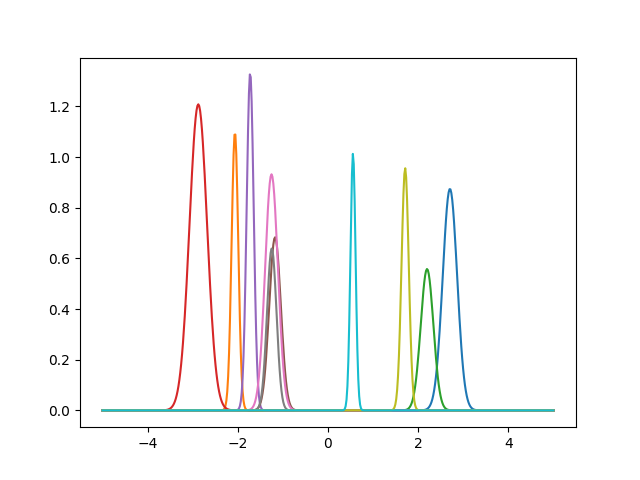

In [ ]:
plt.figure()

for i in range(10):
    plt.plot(x, gaussians[i])

In [9]:
import torch
import torch.nn as nn

In [22]:
sequence_length = 500 # num of x values
input_size = 2 # 2 because we have (x, intensity) coordinates, which are 2 features

# input shape should be: (batch_size, sequence_length, input_size)
batch_size = 5 # can make batch size = 5?

In [ ]:
class PeakFinderRNN(nn.Module):
    def __init__(self, input_size=2, hidden_size=64, output_size=1):
        super().__init__()
        self.rnn = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)  # output_size=1 for peak position regression
    
    def forward(self, x):
        # x shape: (batch, seq_len, input_size)
        out, (hn, cn) = self.rnn(x)
        # hn shape: (num_layers * num_directions, batch, hidden_size)
        hn = hn[-1]  # Take the last layer's hidden state
        out = self.fc(hn)  # Predict peak position
        return out.squeeze(-1)  # shape: (batch,)

In [18]:
i = 1
peak_idx = gaussians[i].argmax()
peak_x = x[peak_idx]

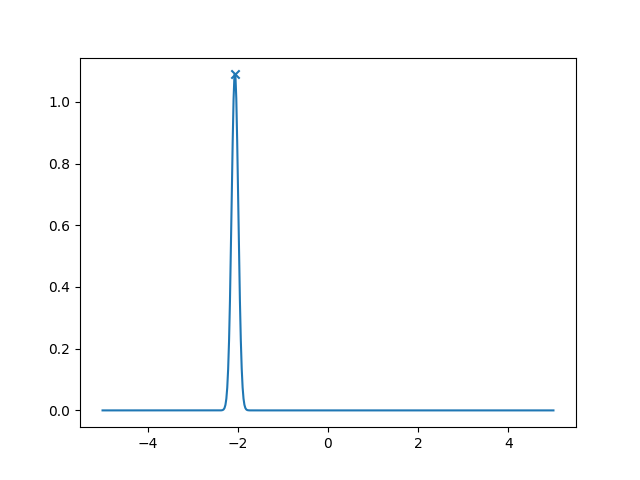

In [19]:
peak_idx
plt.figure()
plt.scatter(peak_x, gaussians[i][peak_idx], marker='x')
plt.plot(x, gaussians[i])

In [55]:
import torch.optim as optim

In [75]:
total_num = gaussians.shape[0]

all_x_arrs = []
for _ in range(total_num):
    all_x_arrs.append(x)

all_xs = np.stack(all_x_arrs, axis=0)
all_xs.shape

(10000, 500)

In [76]:
sequence_length = gaussians.shape[1]

idx_1 = int(total_num*0.6)
idx_2 = int(total_num*0.8)

train_x = torch.from_numpy(all_xs[0 : idx_1])
train_gauss = torch.from_numpy(gaussians[0 : idx_1])

val_x = torch.from_numpy(all_xs[idx_1 : idx_2])
val_gauss = torch.from_numpy(gaussians[idx_1 : idx_2])

test_x = torch.from_numpy(all_xs[idx_2 : ])
test_gauss = torch.from_numpy(gaussians[idx_2 : ])

In [77]:
all_xs.shape

(10000, 500)

In [78]:
print(train_x.shape)
print(val_x.shape)
print(test_x.shape)

print(train_x.shape)
print(val_x.shape)
print(test_x.shape)

torch.Size([6000, 500])
torch.Size([2000, 500])
torch.Size([2000, 500])
torch.Size([6000, 500])
torch.Size([2000, 500])
torch.Size([2000, 500])


In [79]:
from torch.utils.data import DataLoader, TensorDataset

train_x = train_x.float()
val_x = val_x.float()
test_x = test_x.float()

In [80]:
train_gauss = train_gauss.float()
val_gauss = val_gauss.float()
test_gauss = test_gauss.float()

In [81]:
train_ds = TensorDataset(train_x, train_gauss)
val_ds = TensorDataset(val_x, val_gauss)
test_ds = TensorDataset(test_x, test_gauss)

In [82]:
train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(val_ds, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_ds, batch_size=batch_size, shuffle=False)

In [84]:
model = PeakFinderRNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters, lr=1e-3)

NameError: name 'PeakFinderRNN' is not defined